##ASTR400B
#Homework 6
#Yuxuan Chen
#3/5/2020

In [1]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass


In [2]:
def OrbitCOM(galaxy, start, end, n):
    # compose the filename for output
    #fileout1 = "Orbit_MW.txt"
    #fileout2 = "Orbit_M31.txt"
    #fileout3 = "Orbit_M33.txt"
    fileout = "Orbit_" + galaxy + ".txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    #Cause M33 does not have bulge as we know from last class, so the 
    #way to calculate M33 is differenct from M31 MW. So we have to set
    #the if conditions to separate MW M31 and M33
    if 'MW'or 'M31' in galaxy:
        delta = 0.1
        VolDec = 2

    else:
        delta = 0.1
        VolDec = 4

    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    generate_snapshot_id_sequence = np.arange(start,end+1,n)
    orbit = np.zeros([generate_snapshot_id_sequence.size,7])
        
    # Writing a for loop to process the file read and calculate
    for i, snap_id in enumerate(generate_snapshot_id_sequence):  # loop over files
        
        # compose the data filename (be careful about the folder)
        # Those code we did in last homework, for reading and selecting files
        ilbl = '000' + str(snap_id)
        ilbl = ilbl[-3:]
        #copied VLowRes from astr400b files in NImoy
        filename='./VLowRes/%s_'%(galaxy) + ilbl + '.txt'
        
        # Initialize an instance of CenterOfMass class, using disk particles
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        #COMOG stands for center mass of galaxy
        COMOG = CenterOfMass(filename, 2)
        COMOG_P = COMOG.COM_P(delta, VolDec)
        COMOG_V = COMOG.COM_V(COMOG_P[0],COMOG_P[1],COMOG_P[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value)
        #units of (Gyr)
        # note that you can store 
        # a[i] = var1, *tuple(array1) 
        orbit[i] = (COMOG.time.value)/1000, COMOG_P[0].value, COMOG_P[1].value, COMOG_P[2].value, COMOG_V[0].value, COMOG_V[1].value, COMOG_V[2].value
        
        # print snap_id to see the progress
        print(snap_id)
             
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))



In [ ]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first!
#Tested alredy, I dont deserve to print, so commented the code
''''
OrbitCOM('MW',0,800,5)
OrbitCOM('M31',0,800,5)
OrbitCOM('M33',0,800,5)

In [3]:
#This part Yuanjea helped me.
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
MW_data = np.genfromtxt("Orbit_MW.txt",dtype=None,names=True)
M31_data = np.genfromtxt("Orbit_M31.txt",dtype=None,names=True)
M33_data = np.genfromtxt("Orbit_M33.txt",dtype=None,names=True)

In [4]:
#This part Yuanjeahelped me
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit
#MODG stands for magnitude of the difference between two vectors(Galaxy)
#G1e1 means data/set of Galaxy 1's element 1
#G2e1 means data/set of Galaxy 2's element 1
#The same goes for G1e2,G2e2,G1e3.G2e3
def MODG(G1e1, G2e1, G1e2, G2e2, G1e3, G2e3):  
    #inputs:G1e1, G2e1, G1e2, G2e2, G1e3, G2e3
    #return the magnitude of the difference between two vectors 
    return np.sqrt((G1e1 - G2e1)**2 + (G1e2 - G2e2)**2 + (G1e3 - G2e3)**2 )

In [5]:
# Determine the magnitude of the relative position and velocities 
#Use the fucntion we have defined above
#PM_MW_31 means position magnitude between MW and M31
#VM_MW_31 means velocities magnitude between MW and M31
#G1e1 means data/set of Galaxy 1's element 1
#G2e1 means data/set of Galaxy 2's element 1
#G3e1 means data/set of Galaxy 3's element 1
#The same goes for others
G1e1 = MW_data['x']
G1e2 = MW_data['y']
G1e3 = MW_data['z']
G2e1 = M31_data['x']
G2e2 = M31_data['y']
G2e3 = M31_data['z']
G3e1 = M33_data['x']
G3e2 = M33_data['y']
G3e3 = M33_data['z']

G1e4 = MW_data['vx']
G1e5 = MW_data['vy']
G1e6 = MW_data['vz']
G2e4 = M31_data['vx']
G2e5 = M31_data['vy']
G2e6 = M31_data['vz']
G3e4 = M33_data['vx']
G3e5 = M33_data['vy']
G3e6 = M33_data['vz']

PM_MW_M31= MODG(G1e1, G2e1, G1e2, G2e2, G1e3, G2e3)
VM_MW_M31 = MODG(G1e4, G2e4, G1e5, G2e5, G1e6, G2e6)

#PM_M31_33 means position magnitude between M31 and M33
#VM_M31_33 means velocities magnitude between M31 and M33
PM_M31_M33 = MODG(G2e1, G3e1, G2e2, G3e2, G2e3, G3e3)
VM_M31_M33 = MODG(G2e4, G3e4, G2e5, G3e5, G2e6, G3e6)


Text(0.5, 1.0, 'MW&M31&M33, time vs separation Plot')

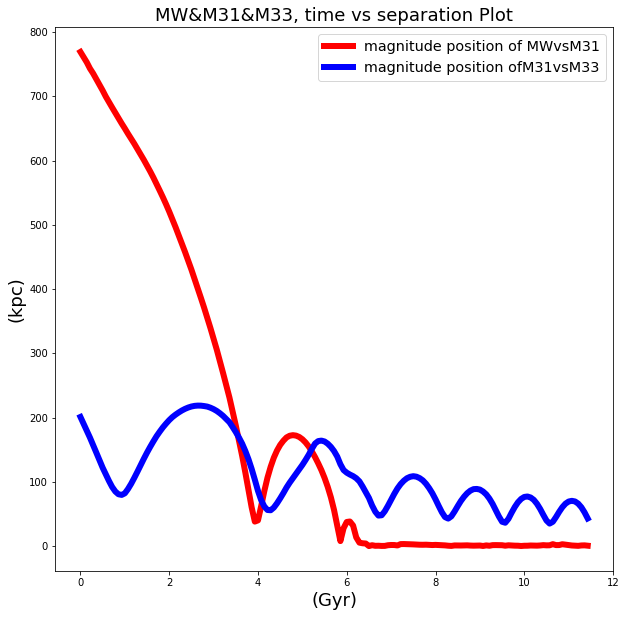

In [6]:
# Plot the Orbit of the galaxies 
#################################
#Those plot code from Homework5 and InclassLab 
#build image size
fig = plt.figure(figsize=(10,10))  
ax = plt.subplot(111) 
#use plt.plot is better for this case
plt.plot(MW_data['t'], PM_MW_M31, linewidth = 6,color = 'red', label = 'magnitude position of MWvsM31')
plt.plot(M31_data['t'], PM_M31_M33,linewidth = 6, color = 'blue', label = 'magnitude position ofM31vsM33')
#x lable is time
#y label is separation
plt.xlabel('(Gyr)',fontsize = 18)
plt.ylabel('(kpc)',fontsize = 18)
legend = ax.legend(loc='best',fontsize='x-large')
plt.title('MW&M31&M33, time vs separation Plot',fontsize=18)


Text(0.5, 1.0, 'MW&M31&M33, time vs velocity Plot')

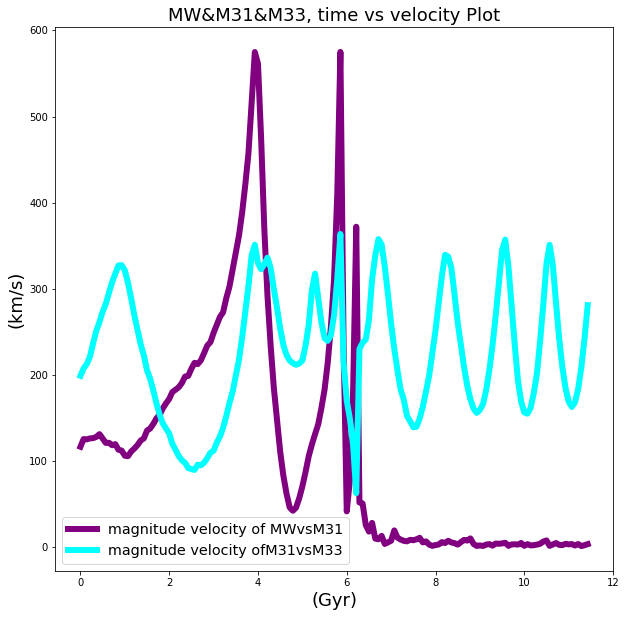

In [7]:
# Plot the Orbit of the galaxies 
#################################
#Those plot code from Homework5 and InclassLab
#build image size
fig = plt.figure(figsize=(10,10))  
ax = plt.subplot(111) 
#use plt.plot is better for this case
plt.plot(MW_data['t'], VM_MW_M31, linewidth = 6,color = 'purple', label = 'magnitude velocity of MWvsM31')
plt.plot(M33_data['t'], VM_M31_M33,linewidth = 6, color = 'cyan', label = 'magnitude velocity ofM31vsM33')
#x lable is time
#y label is velocity
plt.xlabel('(Gyr)',fontsize = 18)
plt.ylabel('(km/s)',fontsize = 18)
legend = ax.legend(loc='best',fontsize='x-large')
plt.title('MW&M31&M33, time vs velocity Plot',fontsize=18)

##Questions 
#1.Howmany close encounters will the MW and M31 experience in future

I think based on my plot above, there are 3 encounters will MW and M31 experience in the future

#2.How is the time evolution of the separation and relative velocity related?

Compared those plots above, I find that, since the galaxys encounters that the velocities has fluctuate widly. After encounters, the galaxies back to more stayable velocities, or the fluactuation of velocities become smaller

#3.When do M31 and MW merge?

Combined those plots, I can say that the M31 and MW merge around 6.1-6.5 Gyr

#4.What is roughly the decay rate of M33's orbit after 6Gyr? If this rate is constant. how long will it take M33 to merge with combined Mw+M31 remnant if it is at a distance of 75 kpc

The decay rate of M33 after 6 Gyr, sames like -12.16km/s per Gyr or -13.87kpc / Gyr
5.4 Gyr will it take M33 to merge with combined Mw+M31 remnant if it is at a distance of 75 kpc (75/13.87 = 5.4 Gyr)

In [33]:
VM_M31_M33[90:130]

array([241.30309323, 264.00621849, 310.93576202, 338.69251852,
       357.74633821, 351.45322093, 325.64075636, 293.59936614,
       259.54862011, 230.41240179, 205.33358639, 183.22475297,
       171.11576578, 152.57143704, 146.17056612, 139.36408038,
       139.90863912, 149.54244983, 163.2656063 , 181.01668929,
       199.30647606, 225.90401524, 251.81733022, 283.49140534,
       314.79808354, 339.50570584, 337.45466555, 324.48310911,
       293.22551628, 260.81067214, 234.7558274 , 209.1796111 ,
       187.67418709, 171.84404005, 161.02809258, 156.0739123 ,
       159.48383335, 166.40686284, 182.80125711, 206.10598778])

In [34]:
PM_M31_M33[90:130]

array([ 83.96198306,  75.05658998,  63.3239615 ,  53.64842402,
        47.593031  ,  48.09204924,  54.31062787,  62.95715448,
        72.30090663,  81.43713281,  89.84818418,  96.57164905,
       101.87038137, 105.74127293, 107.98852948, 108.90063407,
       108.11782092, 105.87102484, 102.35592411,  97.02459946,
        90.27292894,  82.29463834,  72.92387401,  62.68428511,
        52.8143437 ,  45.26957256,  42.89399725,  46.42928063,
        53.95607565,  62.32296607,  70.23787369,  76.99647849,
        82.45968227,  86.43934636,  88.74713855,  89.07070506,
        88.06212523,  85.05582755,  80.5476089 ,  74.06050027])

In [35]:
M33_data['t'][90:130]

array([6.429, 6.5  , 6.571, 6.643, 6.714, 6.786, 6.857, 6.929, 7.   ,
       7.071, 7.143, 7.214, 7.286, 7.357, 7.429, 7.5  , 7.571, 7.643,
       7.714, 7.786, 7.857, 7.929, 8.   , 8.071, 8.143, 8.214, 8.286,
       8.357, 8.429, 8.5  , 8.571, 8.643, 8.714, 8.786, 8.857, 8.929,
       9.   , 9.071, 9.143, 9.214])

In [19]:
(VM_M31_M33[115]-VM_M31_M33[94])/(M33_data['t'][115]-M33_data['t'][94])

-12.160421575472546

In [37]:
(PM_M31_M33[125]-PM_M31_M33[105])/(M33_data['t'][125]-M33_data['t'][105])

-13.876787267644252